## Introduction

For this project I have chosen to investigate the Sean Lahman baseball dataset containing batting and pitching statistics from 1871 to 2016, plus fielding statistics, standings, team stats, managerial records, post-season data, and more.

I would like to use this project to illustrate what I have learned in the first module of the Udacity Data Analysis Nanodegree: Introduction to Data Analysis.

1. Formulating Questions
2. Data Wrangling
3. Drawing Conclusions
4. Communication of Findings

### Step 1: Forumulating Questions

Taking a look at the csv dataset I see that it contains a large quantity of statistical information that could be used to answer many questions. Below are two that are interesting to me.

1. Is there any overall correlation between a pitcher's ERA and thier salary?
2. Is there any correlation between a player's batting average and thier salary?

From here it is a good idea to list the .csv files that I will need to answer my questions. I think the following will be sufficient:

#### Q1
1. Pitching.csv - Contains individual player pitching data
2. Salaries.csv - Contains individual player salary data

#### Q2
1. Batting.csv - Contains individual player batting data \**
2. Salaries.csv - Contains individual player salary data

\** note that Batting.csv does not contain batting average as a column. We will need to compute it.

### Step 2: Data Wrangling

Now we can start the data wrangling process. First lets import all of the csv data into individual pandas dataframes and take a look at what we are working with.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import csv
import os

datapath = os.path.normpath('C:\\Users\\Andy\\Documents\\PythonScripts_Laptop\\Udacity\\Project1\\baseballdatabank-2017.1\\baseballdatabank-2017.1\\core\\')

In [2]:
Pitching_df = pd.read_csv(os.path.join(datapath,'Pitching.csv'))
Salaries_df = pd.read_csv(os.path.join(datapath,'Salaries.csv'))
Batting_df = pd.read_csv(os.path.join(datapath,'Batting.csv'))

In [3]:
print("Pitching")
print(Pitching_df.head())
print("\n")

print("Salaries")
print(Salaries_df.head())
print("\n")

print("Batting")
print(Batting_df.head())
print("\n")

Pitching
    playerID  yearID  stint teamID lgID   W   L   G  GS  CG  ...   IBB  WP  \
0  bechtge01    1871      1    PH1  NaN   1   2   3   3   2  ...   NaN NaN   
1  brainas01    1871      1    WS3  NaN  12  15  30  30  30  ...   NaN NaN   
2  fergubo01    1871      1    NY2  NaN   0   0   1   0   0  ...   NaN NaN   
3  fishech01    1871      1    RC1  NaN   4  16  24  24  22  ...   NaN NaN   
4  fleetfr01    1871      1    NY2  NaN   0   1   1   1   1  ...   NaN NaN   

   HBP  BK  BFP  GF    R  SH  SF  GIDP  
0  NaN   0  NaN NaN   42 NaN NaN   NaN  
1  NaN   0  NaN NaN  292 NaN NaN   NaN  
2  NaN   0  NaN NaN    9 NaN NaN   NaN  
3  NaN   0  NaN NaN  257 NaN NaN   NaN  
4  NaN   0  NaN NaN   21 NaN NaN   NaN  

[5 rows x 30 columns]


Salaries
   yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625

Immediately I can see some properties of the data that we are going to need to keep in mind:

1. Pitching and Batting data both start in the same year, 1871. This is good!
2. Salary data starts in 1985, this might pose a problem.
3. Again, we will need to compute the batting average for each player in order to answer question 3.

Note: three common keys that could be helpful to keep in mind: playerId, yearID and teamID.  

Lets start by computing the batting average for each player in Batting_df. First we should figure out the formula for computing the batting average. 

$$AVG=HITS/ATBATS$$

Hits is just a sum of all times a player reached 1st, 2nd, 3rd base or hit a home run. It looks like this is provided for us in Batting_df['H']

We can accomplish this by dividing the relevant columns of the Batting_df dataframe and appending the output to a new column 'BAVG'. Also, batting averages are expressed traditionally to 3 decimal places so we can use apply/lambda to round our new column in an efficient manner.

In [4]:
Batting_df['BAVG'] = Batting_df['H']/Batting_df['AB']

Batting_df['BAVG'] = Batting_df['BAVG'].apply(lambda x: round(x,3))

print(Batting_df['BAVG'].describe())


count    87435.000000
mean         0.208783
std          0.122413
min          0.000000
25%          0.147000
50%          0.231000
75%          0.274000
max          1.000000
Name: BAVG, dtype: float64


Next lets merge Salaries_df, Pitching_df and Batting_df on playerID, yearID and teamID in a way that helps us answer Q2 and Q3. 

Since we do not care about data that does not include salary, we can create two separate dataframes using pandas merge.  If we utilize the merge left_on features with the right keys, we can drop data that does not include entries in both datasets; therefore dropping all data that does not have relevant salary information.

In [5]:
Q1_df = Salaries_df.merge(Pitching_df,how='left',on=['playerID','yearID','teamID','lgID'])
Q2_df = Salaries_df.merge(Batting_df,how='left',on=['playerID','yearID','teamID','lgID'])

print(Q1_df['yearID'].describe())
print("\n")
print(Q1_df['salary'].describe())
print("\n")
print(Q1_df['ERA'].describe())
print("\n")

print(Q2_df['yearID'].describe())
print("\n")
print(Q2_df['salary'].describe())
print("\n")
print(Q2_df['BAVG'].describe())
print("\n")

count    26431.000000
mean      2000.878400
std          8.908878
min       1985.000000
25%       1994.000000
50%       2001.000000
75%       2009.000000
max       2016.000000
Name: yearID, dtype: float64


count    2.643100e+04
mean     2.085549e+06
std      3.455172e+06
min      0.000000e+00
25%      2.944040e+05
50%      5.500000e+05
75%      2.350000e+06
max      3.300000e+07
Name: salary, dtype: float64


count    11792.000000
mean         4.743864
std          3.557083
min          0.000000
25%          3.320000
50%          4.200000
75%          5.310000
max        108.000000
Name: ERA, dtype: float64


count    26437.000000
mean      2000.878012
std          8.907966
min       1985.000000
25%       1994.000000
50%       2001.000000
75%       2009.000000
max       2016.000000
Name: yearID, dtype: float64


count    2.643700e+04
mean     2.085160e+06
std      3.454878e+06
min      0.000000e+00
25%      2.937500e+05
50%      5.500000e+05
75%      2.350000e+06
max      3.300000e+07

As we had hoped, the datasets start in the year 1985 and all include a salary component. The only thing that jumps out is the MAX era shows as 108! This is a pretty terrible stat. We should probably check it out to make sure that this is not erroneous data.

$$ERA= 9 * (Earned Runs/Innings Pitched)$$

The Pitching_df contains IPouts which is equal to Innings Pitched * 3 (there are 3 outs per inning and pitchers can be pulled in the middle of an inning for various reasons...)

This means we will need to divid IPouts by 3 to get the proper number for the ERA calculation.

In [6]:
locator = Q1_df[Q1_df['ERA'] == 108].index

print(Q1_df['ER'].loc[locator])
print(Q1_df['IPouts'].loc[locator])

print([9*Q1_df['ER'].loc[locator]/(Q1_df['IPouts'].loc[locator]/3)])

10969    4.0
23467    4.0
Name: ER, dtype: float64
10969    1.0
23467    1.0
Name: IPouts, dtype: float64
[10969    108.0
23467    108.0
dtype: float64]


Looks like this data is reasonable and these two pitchers had equally bad innings and equally short careers!

### Step 3: Drawing Conclusions

Now that we are happy with our data, its time to dig in and start analyzing.  Lets start by restating our questions:

1. Is there any overall correlation between a pitcher's ERA and thier salary?
2. Is there any correlation between a player's batting average and thier salary?

#### Question 1

Lets take a quick look at the pitching ERA and Salary in a matplotlib histogram. We can write a function here that takes in a dataframe and a key of interest and plots a histogram since we may want to do this multiple times with different keys.

In [7]:
def plot_hist_from_df(dataframe,key):
    print("Descriptive Stats For Key \"" + str(key) +"\"\n")
    print(dataframe[key].describe())
    dataframe[key].hist()

Descriptive Stats For Key "ERA"

count    11792.000000
mean         4.743864
std          3.557083
min          0.000000
25%          3.320000
50%          4.200000
75%          5.310000
max        108.000000
Name: ERA, dtype: float64


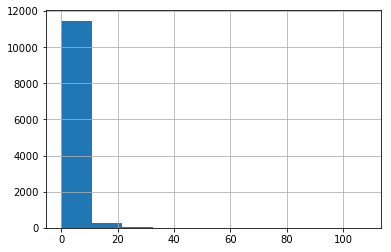

In [8]:
#Call our stats/hist function for pitching ERA
plot_hist_from_df(Q1_df,'ERA')

Descriptive Stats For Key "salary"

count    2.643100e+04
mean     2.085549e+06
std      3.455172e+06
min      0.000000e+00
25%      2.944040e+05
50%      5.500000e+05
75%      2.350000e+06
max      3.300000e+07
Name: salary, dtype: float64


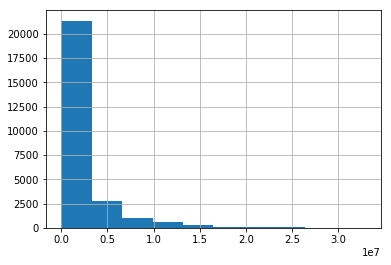

In [9]:
#Call our stats/hist function for pitching Salary
plot_hist_from_df(Q1_df,'salary')

From the two histograms above we can conclude (approximately) that the vast majority of pitchers have an ERA of <= 20, and are paid <= $10,000,000. This is an interesting conclusion, but I dont think we have enough here to say that the two variables are or are not correlated in any way...

Since we want to look at correlation between two variables, this is a good opportunity to use Pearsons R as taught in this lesson.  This was a new concept for me so I am eager to practice it. We can start by outlining what Pearsons R is.

Simply put, pearsons R is a way of standardizing data for two variables and measuring how negatively or positively they are correlated on a scale from -1 to 1.  If the Pearsons R shows a correlation of 0 then the variables are not correlated at all.

Pearsons R is Calculated as follows:

Step 1: Standardize our data.

From the lesson we learned that to standardize the data we use the following code.

std_x = (x-x.mean()) / x.std(ddof=0)  
std_y = (y-y.mean()) / y.std(ddof=0)

Step 2: Multiply the standardized data and take the mean.

(std_x * std_y).mean()

This will give us Pearsons R!  Lets assume that the Pitchers ERA is X and Salary is Y and try to apply this method to our data. We can write a function to calculate pearsons R for general X and Y dataframe variables and a given key.

In [10]:
def pearsons_r(x,y,key_x,key_y):
    #Calculation for Standardizing X
    std_x = (x[key_x]-x[key_x].mean()) / x[key_x].std(ddof=0)
    #Calculation for Standardizing Y
    std_y = (y[key_y]-y[key_y].mean()) / y[key_y].std(ddof=0)
    #Pearsons R
    return(round((std_x * std_y).mean(),3))

In [11]:
Pearson_ERA_Salary = pearsons_r(Q1_df,Q1_df,'ERA','salary')

print(Pearson_ERA_Salary)

-0.068


Ok so it looks like there is not a strong correlation between a pitcher's ERA and their salary. To be sure we are doing our calculaton right, we can calculate Pearsons R for something we know should be strongly correlated and see what we come up with. How about innings pitched outs (IPouts) and earned runs (ER)?  I think it makes sense that statistically, the more innings you pitch the higher your earned runs will be.

In [12]:
Pearson_IPouts_ER = pearsons_r(Q1_df,Q1_df,'IPouts','ER')

print(Pearson_IPouts_ER)

0.917


As expected there is a very strong correlation between innings pitched and earned runs.  I think we can safely conclude that there is no correlation between a Pitcher's ERA and how much they get paid.

#### Question 2

Again lets take a quick look at the data in question, batting average and salary, using our previously defined stats/hist function.

Descriptive Stats For Key "BAVG"

count    19620.000000
mean         0.211257
std          0.119723
min          0.000000
25%          0.159000
50%          0.242000
75%          0.276000
max          1.000000
Name: BAVG, dtype: float64


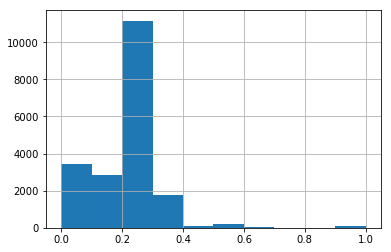

In [13]:
#Call our stats/hist function for batter Batting Average
plot_hist_from_df(Q2_df,'BAVG')

Descriptive Stats For Key "salary"

count    2.643100e+04
mean     2.085549e+06
std      3.455172e+06
min      0.000000e+00
25%      2.944040e+05
50%      5.500000e+05
75%      2.350000e+06
max      3.300000e+07
Name: salary, dtype: float64


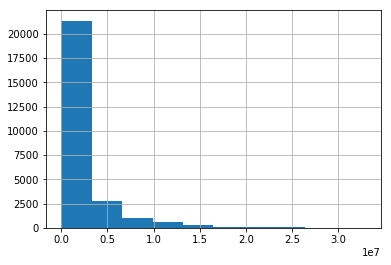

In [14]:
#Call our stats/hist function for batter Salary
plot_hist_from_df(Q1_df,'salary')

This time our batting average histogram produced an interesting shape!  It seems that the batter batting average majority settles in between 0.2 and 0.3, however there are non trivial numbers of batters with averages on either side of the peak.  Lets take a look at pearsons R again and see if they are correlated.

In [15]:
Pearson_BAVG_Salary = pearsons_r(Q2_df,Q2_df,'BAVG','salary')

print(Pearson_BAVG_Salary)

0.057


It seems that just as was the case with pitchers ERA, batting average and salary are not strongly correlated.

### Step 4: Illustrating Your Findings

Since our findings consist of a set of pearsons R values, we can present these on a bar chart clearly and concisely. We can use this example code from the matplotlib website to accomplish this (https://matplotlib.org/examples/api/barchart_demo.html)

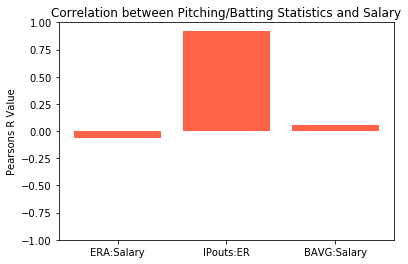

In [16]:
N=3
data_to_plot = [Pearson_ERA_Salary,Pearson_IPouts_ER,Pearson_BAVG_Salary]

ind = np.arange(N)  # the x locations for the groups
#width = 0.3       # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(ind, data_to_plot, color='tomato')

# add some text for labels, title and axes ticks
ax.set_ylabel('Pearsons R Value')
ax.set_ylim(-1,1)
ax.set_title('Correlation between Pitching/Batting Statistics and Salary')
ax.set_xticks(ind)
ax.set_xticklabels(('ERA:Salary', 'IPouts:ER', 'BAVG:Salary'))


